# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users=pd.read_csv('/datasets/megaline_users.csv')
calls=pd.read_csv('/datasets/megaline_calls.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')



## Preparar los datos

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R= Puedo observar que los datos estan bien, es un dataframe muy pequeño pero con información concisa para trabajar, describe apropiadamente a mi parecer los datos de ambas tarifas. En la información general veo que los datatypes son los adecuados y no veo necesidad de transformar alguno a un diferente type. Si tuvieramos que agregar algo talvez para un mejor entendimiento de los usuarios sería agregar una columna extra de gb_included para que en lugar de tener la info en mb, los usuarios conozcan cuantos gb equivalen a la cantidad de mb que se les ofrece.

De igual forma podriamos ordenar las columnas, colocando plan_name al principio del DF para mejor entendimiento y visualizacion de los datos. 

## Corregir datos

In [5]:
#primero agregamos esa columna extra convirtiendo los mb a gb
plans['gb_included']= plans['mb_per_month_included'] / 1024



## Enriquecer los datos

In [6]:
#Ahora ordenamos nuestras columnas para una mejor visualización de los datos 
plans= plans[["plan_name", "usd_monthly_pay", "messages_included", "minutes_included", "mb_per_month_included", "gb_included",
          "usd_per_message",  "usd_per_minute" ,"usd_per_gb" ]]
plans.head()

,plan_name,usd_monthly_pay,messages_included,minutes_included,mb_per_month_included,gb_included,usd_per_message,usd_per_minute,usd_per_gb
0,surf,20,50,500,15360,15.0,0.03,0.03,10
1,ultimate,70,1000,3000,30720,30.0,0.01,0.01,7


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users=pd.read_csv('/datasets/megaline_users.csv') #Agregue de nuevo el Df por si necesitaba reiniciarlo iterara unicamente sobre este y no sobre los otros 4 Df
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
302,1302,Leonila,Morris,62,"Rochester, NY MSA",2018-01-21,surf,NaN
151,1151,Ralph,Monroe,21,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-20,surf,NaN
308,1308,Samara,Monroe,46,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-11-22,surf,NaN
271,1271,Darrin,Rose,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-24,surf,NaN
277,1277,Andrew,Faulkner,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-02,surf,NaN
29,1029,Franklyn,Henson,59,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-05,surf,NaN
298,1298,Loyce,Cooley,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-09-21,surf,2018-12-19
322,1322,Tyler,Sweeney,22,"Fresno, CA MSA",2018-06-18,surf,NaN
79,1079,Brian,Mccall,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-26,surf,NaN
188,1188,Ethelene,Brock,31,"Richmond, VA MSA",2018-01-10,ultimate,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R= Como dato a mejorar, podemos transformar la columna reg_date y churn_date a tipo datetime, ya que estamos trabajando con fechas. De igual forma tenemos que en la columna churn_date hay valores NaN debido a que el servicio del usuario sigue activo, por lo tanto para transformarlas a tipo datetime y evitar errores con los valores ausentes NaN aplicamos el parámetro errors="coerce" para que en lugar de lanzar un error con un valor no convertible, los convierte en NaT (Not a time), el equivalente a NaN para fechas. Por lo demás vemos que los datatypes son los adecuados.

Deberiamos tambien camiar el dtype de user_id a object, ya que no haremos operaciones aritméticas con aquellos valores al ser valores que representan a cada usuario como único. 


### Corregir los datos

In [9]:
#Transformamos reg_date y churn_date a tipo datetime.
users["reg_date"] = pd.to_datetime(users["reg_date"])
users["churn_date"] = pd.to_datetime(users["churn_date"], errors="coerce") #Aplicamos coerce para evitar errores con los datos NaN
users["user_id"]=users['user_id'].astype(object)
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
321,1321,Karlyn,Jimenez,19,"North Port-Sarasota-Bradenton, FL MSA",2018-05-31,surf,NaT
319,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT
278,1278,Masako,Montgomery,39,"Dayton-Kettering, OH MSA",2018-11-03,surf,NaT
433,1433,Lyndon,Morrison,29,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-29,ultimate,NaT
39,1039,Flo,Hicks,56,"Columbus, OH MSA",2018-05-30,ultimate,NaT
224,1224,Kelly,Cole,74,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-06-28,ultimate,NaT
71,1071,Isa,Roy,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-23,surf,NaT
188,1188,Ethelene,Brock,31,"Richmond, VA MSA",2018-01-10,ultimate,NaT
78,1078,Earnest,Gray,47,"Seattle-Tacoma-Bellevue, WA MSA",2018-02-11,surf,NaT
26,1026,Meggan,Hamilton,49,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-20,ultimate,NaT


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

R= Podríamos agregar una columna llamada "active_user" para poder filtar más adelante y poder visualizar mejor cuales son los usuarios que siguen con su plan activo

In [10]:
users["active_user"] = users["churn_date"].isna()
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active_user
20,1020,Rutha,Bell,56,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-08,surf,NaT,True
230,1230,Andre,Estes,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-27,ultimate,NaT,True
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12,False
328,1328,Tamesha,Huber,20,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-02-10,surf,NaT,True
11,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaT,True
478,1478,Elane,David,51,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-28,ultimate,NaT,True
363,1363,Sandee,Lott,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-01-05,ultimate,2018-08-16,False
205,1205,Rafael,Wade,43,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-05,surf,NaT,True
70,1070,Jacelyn,Contreras,66,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-05-12,surf,NaT,True
270,1270,Anjelica,Chan,70,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-09-18,ultimate,NaT,True


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls=pd.read_csv('/datasets/megaline_calls.csv') #Volví a cargar el DF meramente por si ocupo reiniciarlo, no tenga que reiniciar los otros 4 que cargamos al inicio.
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
calls.head(10)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R= En este DF podemos cambiar el dtype de call_date a datetime ya que estamos trabajando con una fecha, de igual forma podriamos modificar el dtype de user_id de int a object, ya que no haremos operaciones aritméticas con este valor.

### Corregir los datos

In [13]:
calls['call_date']=pd.to_datetime(calls['call_date'])
calls['user_id']= calls['user_id'].astype(object)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

R=Meramente para que la visualización sea más clara, podríamos cambiar el nombre de la columna "duration" y agregarle algo como "minutes_duration" para dar a entender que la duración de la llamada se esta midiendo en minutos (a pesar que en nuestro diccionario de datos lo menciona)

In [14]:
calls.rename(columns={'duration':'minutes_duration'}, inplace=True)
calls.head(10)

,id,user_id,call_date,minutes_duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R=Igual que en DF anteriores, convertiremos 'user_id' a object type y 'message_date' a datetime para mejor manejo de los datos.

### Corregir los datos

In [17]:
messages['user_id']=messages['user_id'].astype(object)
messages['message_date']=pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

R=En este DF en particular, pienso no hay nada más que agregar o modificar.

## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(10)

,id,user_id,session_date,mb_used
5450,1030_49,1030,2018-12-27,217.21
90051,1415_155,1415,2018-11-28,506.45
67508,1313_182,1313,2018-11-13,843.33
76590,1359_274,1359,2018-07-18,304.46
88684,1408_403,1408,2018-09-20,841.03
98539,1466_20,1466,2018-06-22,256.37
46488,1206_370,1206,2018-12-19,334.11
5156,1028_739,1028,2018-06-06,1218.24
88761,1408_480,1408,2018-11-21,178.63
99550,1469_43,1469,2018-12-07,112.18


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

R= Igual que en DF anteriores, convertiremos 'user_id' a object type y 'session_date' a datetime para mejor manejo de los datos.

### Corregir los datos

In [20]:
internet['user_id']= internet['user_id'].astype(object)
internet['session_date']=pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

R=Meramente para visualización y graficación agregaría una columna extra en la cual transforme mb_used a gb (db_used).

In [21]:
internet['gb_used']=internet['mb_used']/1024
internet.sample(10)

,id,user_id,session_date,mb_used,gb_used
103218,1494_100,1494,2018-11-18,300.04,0.293008
77770,1362_457,1362,2018-09-13,0.00,0.000000
61545,1280_40,1280,2018-09-27,0.00,0.000000
71675,1334_243,1334,2018-12-13,188.79,0.184365
52781,1238_15,1238,2018-11-15,450.59,0.440029
48161,1214_535,1214,2018-05-07,393.38,0.384160
9057,1046_342,1046,2018-10-23,0.00,0.000000
39675,1179_6,1179,2018-12-18,423.06,0.413145
38448,1172_103,1172,2018-09-18,940.50,0.918457
34671,1156_268,1156,2018-09-17,725.62,0.708613


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans.head()

,plan_name,usd_monthly_pay,messages_included,minutes_included,mb_per_month_included,gb_included,usd_per_message,usd_per_minute,usd_per_gb
0,surf,20,50,500,15360,15.0,0.03,0.03,10
1,ultimate,70,1000,3000,30720,30.0,0.01,0.01,7


## Agregar datos por usuario



In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls["period_time"]= calls["call_date"].dt.to_period("M") #Creamos una nueva columna para conocer el periodo de tiempo en meses

calls_per_user= calls.groupby (["user_id","period_time"]).agg(total_calls=("id","count")).reset_index() #Agrupamos el user-id, periodo de tiempo y agregamos una nueva columna con el total de llamadas hechas en ese periodo de tiempo y user_id

print(calls_per_user.head(10))


   user_id period_time  total_calls
0     1000     2018-12           16
1     1001     2018-08           27
2     1001     2018-09           49
3     1001     2018-10           65
4     1001     2018-11           64
5     1001     2018-12           56
6     1002     2018-10           11
7     1002     2018-11           55
8     1002     2018-12           47
9     1003     2018-12          149


In [37]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

import numpy as np

#Redondeamos los minutos de las llamadas individuales hacia arriba 
calls["minutes_duration"]= np.ceil(calls["minutes_duration"])
print("Minutos redondeados:")
print(calls.head(10))

#Agrupamos el user-id, periodo de tiempo y agregamos una nueva columna con el total minutos en la llamada (duración) en ese periodo de tiempo (mes)
minutes_per_user = calls.groupby(["user_id", "period_time"]).agg(total_minutes=("minutes_duration", "sum")).reset_index() 
print()
print(minutes_per_user.head(10))


Minutos redondeados:
         id user_id  call_date  minutes_duration period_time
0   1000_93    1000 2018-12-27               9.0     2018-12
1  1000_145    1000 2018-12-27              14.0     2018-12
2  1000_247    1000 2018-12-27              15.0     2018-12
3  1000_309    1000 2018-12-28               6.0     2018-12
4  1000_380    1000 2018-12-30               5.0     2018-12
5  1000_388    1000 2018-12-31               3.0     2018-12
6  1000_510    1000 2018-12-27               6.0     2018-12
7  1000_521    1000 2018-12-28              15.0     2018-12
8  1000_530    1000 2018-12-28               6.0     2018-12
9  1000_544    1000 2018-12-26               5.0     2018-12

   user_id period_time  total_minutes
0     1000     2018-12          124.0
1     1001     2018-08          182.0
2     1001     2018-09          315.0
3     1001     2018-10          393.0
4     1001     2018-11          426.0
5     1001     2018-12          412.0
6     1002     2018-10           59.0
7  

In [38]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages["period_time"]= messages["message_date"].dt.to_period("M") #Creamos una nueva columna para conocer el periodo de tiempo en meses

messages_per_user= messages.groupby (["user_id","period_time"]).agg(total_messages=("id","count")).reset_index() #Agrupamos el user-id, periodo de tiempo y agregamos una nueva columna con el total de mensajes enviados en ese periodo de tiempo

print(messages_per_user.head(10))

   user_id period_time  total_messages
0     1000     2018-12              11
1     1001     2018-08              30
2     1001     2018-09              44
3     1001     2018-10              53
4     1001     2018-11              36
5     1001     2018-12              44
6     1002     2018-10              15
7     1002     2018-11              32
8     1002     2018-12              41
9     1003     2018-12              50


In [40]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet["period_time"]=internet["session_date"].dt.to_period("M")
internet_per_user= internet.groupby(["user_id","period_time"]).agg(total_mb_used=("mb_used","sum")).reset_index() #Agregamos cuantos mb uso cada usuario al mes

#Agregamos esta columna en GB y redondeamos los GB
internet_per_user["total_gb_used"]=internet_per_user["total_mb_used"] / 1024 #Tambien agregamos esta columna para su mejor entendimiento en GB 
print(internet_per_user.head(10))
internet_per_user["total_gb_used"]=np.ceil(internet_per_user["total_gb_used"])
print()
print(internet_per_user.head(10))


   user_id period_time  total_mb_used  total_gb_used
0     1000     2018-12        1901.47       1.856904
1     1001     2018-08        6919.15       6.756982
2     1001     2018-09       13314.82      13.002754
3     1001     2018-10       22330.49      21.807119
4     1001     2018-11       18504.30      18.070605
5     1001     2018-12       19369.18      18.915215
6     1002     2018-10        6552.01       6.398447
7     1002     2018-11       19345.08      18.891680
8     1002     2018-12       14396.24      14.058828
9     1003     2018-12       27044.14      26.410293

   user_id period_time  total_mb_used  total_gb_used
0     1000     2018-12        1901.47            2.0
1     1001     2018-08        6919.15            7.0
2     1001     2018-09       13314.82           14.0
3     1001     2018-10       22330.49           22.0
4     1001     2018-11       18504.30           19.0
5     1001     2018-12       19369.18           19.0
6     1002     2018-10        6552.01        

In [41]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merge_df= calls_per_user.merge(minutes_per_user, on= ["user_id","period_time"],how= "outer") #Mezclamos calls_per_user con minutes_per_user basandonos en user_id y period_time
merge_df= merge_df.merge(messages_per_user, on =["user_id","period_time"],how= "outer") #Agregamos el DF messages_per_user
merge_df= merge_df.merge(internet_per_user, on =["user_id","period_time"],how= "outer") #Agregamos el DF internet_per_user
merge_df.fillna(0,inplace=True) #Tenemos valores ausentes por lo tanto les aplicaremos un 0 para evitar problemas con operaciones futuras
print(merge_df.head(10))


   user_id period_time  total_calls  total_minutes  total_messages  \
0     1000     2018-12         16.0          124.0            11.0   
1     1001     2018-08         27.0          182.0            30.0   
2     1001     2018-09         49.0          315.0            44.0   
3     1001     2018-10         65.0          393.0            53.0   
4     1001     2018-11         64.0          426.0            36.0   
5     1001     2018-12         56.0          412.0            44.0   
6     1002     2018-10         11.0           59.0            15.0   
7     1002     2018-11         55.0          386.0            32.0   
8     1002     2018-12         47.0          384.0            41.0   
9     1003     2018-12        149.0         1104.0            50.0   

   total_mb_used  total_gb_used  
0        1901.47            2.0  
1        6919.15            7.0  
2       13314.82           14.0  
3       22330.49           22.0  
4       18504.30           19.0  
5       19369.18         

In [42]:
# Añade la información de la tarifa

df=merge_df.merge(users[["user_id","plan"]],on="user_id", how="left" ) #Unimos nuestro df anterior con la columna "plan" del df "users"
df = df.merge(plans, left_on="plan", right_on="plan_name", how="left") #Unimos el nuevo df con el df de "plans"
df.drop(columns=["plan_name"],inplace= True) #Eliminamos la columna "plan_name" para no tenerla repetida con la columna de "plans" 
print(df.head(10))


  user_id period_time  total_calls  total_minutes  total_messages  \
0    1000     2018-12         16.0          124.0            11.0   
1    1001     2018-08         27.0          182.0            30.0   
2    1001     2018-09         49.0          315.0            44.0   
3    1001     2018-10         65.0          393.0            53.0   
4    1001     2018-11         64.0          426.0            36.0   
5    1001     2018-12         56.0          412.0            44.0   
6    1002     2018-10         11.0           59.0            15.0   
7    1002     2018-11         55.0          386.0            32.0   
8    1002     2018-12         47.0          384.0            41.0   
9    1003     2018-12        149.0         1104.0            50.0   

   total_mb_used  total_gb_used      plan  usd_monthly_pay  messages_included  \
0        1901.47            2.0  ultimate               70               1000   
1        6919.15            7.0      surf               20                 50 

In [46]:

# Calcula el ingreso mensual para cada usuario

df["extra_minutes"]= (df["total_minutes"] - df["minutes_included"]).clip(lower=0)
df["extra_messages"]= (df["total_messages"] - df["messages_included"]).clip(lower=0)
df["extra_gb"]= (df["total_gb_used"] - df["gb_included"]).clip(lower=0)

df["debt"] = (df["usd_monthly_pay"] + (df["extra_minutes"] * df["usd_per_minute"]) + (df["extra_messages"] * df["usd_per_message"]) +  
    (df["extra_gb"] * df["usd_per_gb"]) )
df.head()


,user_id,period_time,total_calls,total_minutes,total_messages,total_mb_used,total_gb_used,plan,usd_monthly_pay,messages_included,minutes_included,mb_per_month_included,gb_included,usd_per_message,usd_per_minute,usd_per_gb,extra_minutes,extra_messages,extra_gb,debt
0,1000,2018-12,16.0,124.0,11.0,1901.47,2.0,ultimate,70,1000,3000,30720,30.0,0.01,0.01,7,0.0,0.0,0.0,70.00
1,1001,2018-08,27.0,182.0,30.0,6919.15,7.0,surf,20,50,500,15360,15.0,0.03,0.03,10,0.0,0.0,0.0,20.00
2,1001,2018-09,49.0,315.0,44.0,13314.82,14.0,surf,20,50,500,15360,15.0,0.03,0.03,10,0.0,0.0,0.0,20.00
3,1001,2018-10,65.0,393.0,53.0,22330.49,22.0,surf,20,50,500,15360,15.0,0.03,0.03,10,0.0,3.0,7.0,90.09
4,1001,2018-11,64.0,426.0,36.0,18504.30,19.0,surf,20,50,500,15360,15.0,0.03,0.03,10,0.0,0.0,4.0,60.00


## Estudia el comportamiento de usuario

### Llamadas

        plan period_time  total_minutes
0       surf     2018-01     203.000000
1       surf     2018-02     297.000000
2       surf     2018-03     330.000000
3       surf     2018-04     351.540000
4       surf     2018-05     399.584416
5       surf     2018-06     431.298969
6       surf     2018-07     449.983471
7       surf     2018-08     410.111111
8       surf     2018-09     414.226804
9       surf     2018-10     429.729958
10      surf     2018-11     423.325088
11      surf     2018-12     473.836478
12  ultimate     2018-01     193.500000
13  ultimate     2018-02     403.142857
14  ultimate     2018-03     304.250000
15  ultimate     2018-04     336.857143
16  ultimate     2018-05     406.241379
17  ultimate     2018-06     370.957447
18  ultimate     2018-07     427.067797
19  ultimate     2018-08     421.436620
20  ultimate     2018-09     437.511628
21  ultimate     2018-10     450.735849
22  ultimate     2018-11     445.196850
23  ultimate     2018-12     459.099338


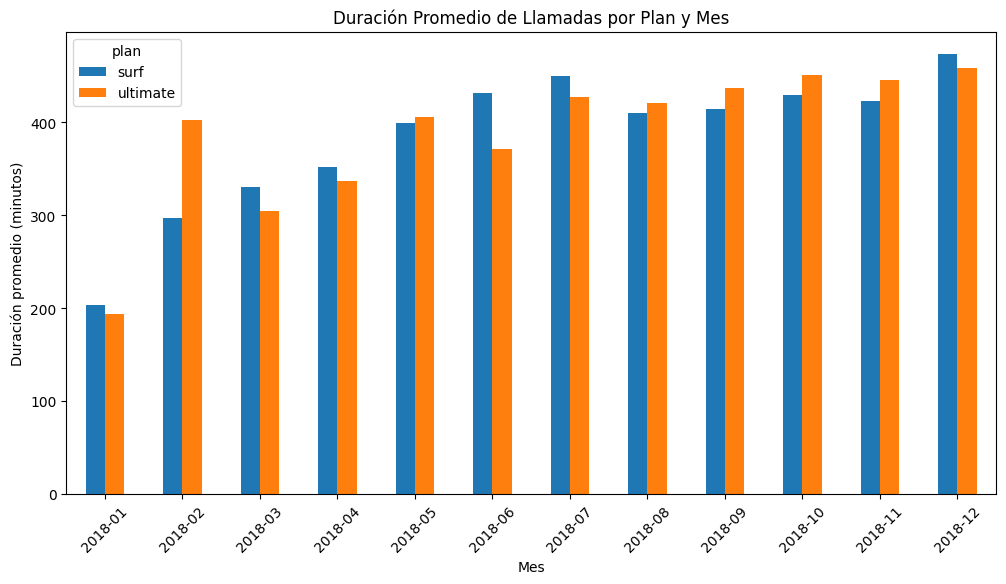

In [47]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
from matplotlib import pyplot as plt

#Calculamos el promedio de lllamadas por plan y mes
avg_call_duration= df.groupby(["plan","period_time"])["total_minutes"].mean().reset_index()
print(avg_call_duration)

# Graficamos...
plt.figure(figsize=(12, 6))
avg_call_duration_pivot = avg_call_duration.pivot(index="period_time", columns="plan", values="total_minutes")
avg_call_duration_pivot.plot(kind="bar", ax=plt.gca())

plt.title("Duración Promedio de Llamadas por Plan y Mes")                   
plt.xlabel("Mes")
plt.ylabel("Duración promedio (minutos)")
plt.xticks(rotation=45)
plt.show()

0     124.0
19     10.0
20     59.0
26    476.0
27    446.0
Name: total_minutes, dtype: float64


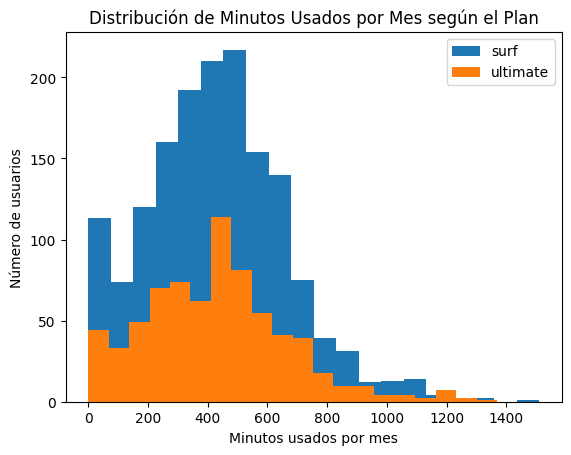

In [48]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_minutes= df[df["plan"]=="surf"]["total_minutes"]
ultimate_minutes= df[df["plan"]=="ultimate"]["total_minutes"]

print(ultimate_minutes.head())

#Creamos el histograma 
surf_minutes.plot(kind="hist", bins= 20)
ultimate_minutes.plot(kind="hist", bins= 20)

plt.xlabel("Minutos usados por mes")
plt.ylabel("Número de usuarios")
plt.title("Distribución de Minutos Usados por Mes según el Plan")
plt.legend(["surf","ultimate"])
plt.show()

.

In [49]:
# Calcula la media y la varianza de la duración mensual de llamadas.

monthly_calls_stats= df.groupby(["plan","period_time"])["total_minutes"].agg(["mean","var"]).reset_index()
monthly_calls_stats.index +=1
print(monthly_calls_stats)

        plan period_time        mean           var
1       surf     2018-01  203.000000  15842.000000
2       surf     2018-02  297.000000  52226.500000
3       surf     2018-03  330.000000  35809.363636
4       surf     2018-04  351.540000  50866.743265
5       surf     2018-05  399.584416  59754.219754
6       surf     2018-06  431.298969  45592.628436
7       surf     2018-07  449.983471  61005.099725
8       surf     2018-08  410.111111  54344.645963
9       surf     2018-09  414.226804  46595.958656
10      surf     2018-10  429.729958  52278.664056
11      surf     2018-11  423.325088  51607.021602
12      surf     2018-12  473.836478  63629.518918
13  ultimate     2018-01  193.500000  16572.333333
14  ultimate     2018-02  403.142857  76889.476190
15  ultimate     2018-03  304.250000  61984.931818
16  ultimate     2018-04  336.857143  34888.928571
17  ultimate     2018-05  406.241379  43841.046798
18  ultimate     2018-06  370.957447  42503.563367
19  ultimate     2018-07  427.0

        plan period_time  total_minutes
0       surf     2018-01          406.0
1       surf     2018-02         2673.0
2       surf     2018-03         7590.0
3       surf     2018-04        17577.0
4       surf     2018-05        30768.0
5       surf     2018-06        41836.0
6       surf     2018-07        54448.0
7       surf     2018-08        66438.0
8       surf     2018-09        80360.0
9       surf     2018-10       101846.0
10      surf     2018-11       119801.0
11      surf     2018-12       150680.0
12  ultimate     2018-01          774.0
13  ultimate     2018-02         2822.0
14  ultimate     2018-03         3651.0
15  ultimate     2018-04         7074.0
16  ultimate     2018-05        11781.0
17  ultimate     2018-06        17435.0
18  ultimate     2018-07        25197.0
19  ultimate     2018-08        29922.0
20  ultimate     2018-09        37626.0
21  ultimate     2018-10        47778.0
22  ultimate     2018-11        56540.0
23  ultimate     2018-12        69324.0


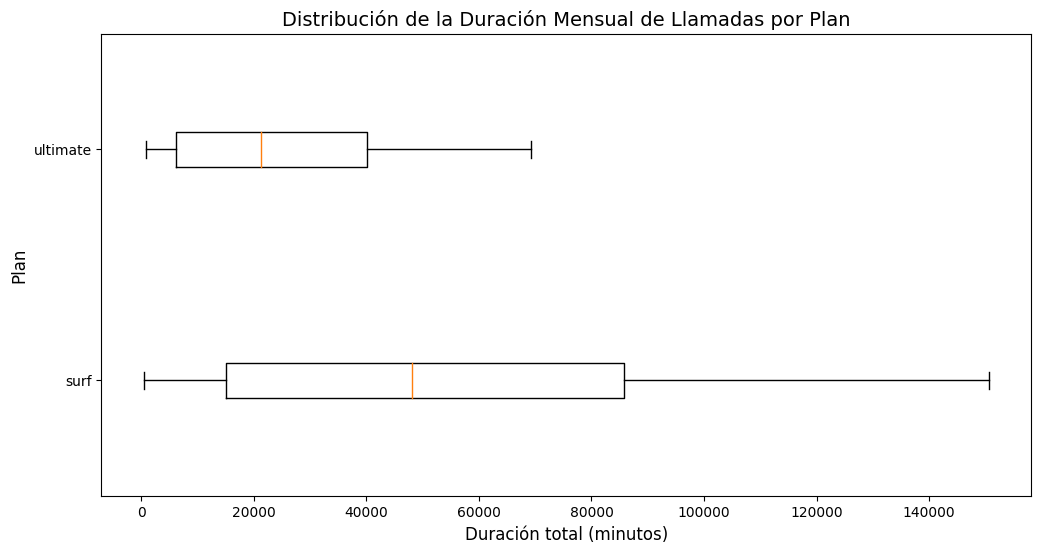

In [50]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

#Sacamos la suma de minutos en llamada (duracion de la llamada) por mes para luego gráficar
minute_calls_per_month= df.groupby(["plan","period_time"])["total_minutes"].sum().reset_index()
print(minute_calls_per_month)
print()

#Graficamos

plans = minute_calls_per_month['plan'].unique()#Separamos ambos planes ("surf","ultimate")

plt.figure(figsize=(12, 6))

data_surf = minute_calls_per_month[minute_calls_per_month['plan'] == "surf"]['total_minutes'].values 
data_ultimate = minute_calls_per_month[minute_calls_per_month['plan'] == "ultimate"]['total_minutes'].values 
      
plt.boxplot([data_surf, data_ultimate], vert=False)

plt.title("Distribución de la Duración Mensual de Llamadas por Plan", fontsize=14)
plt.xlabel("Duración total (minutos)", fontsize=12)
plt.ylabel("Plan", fontsize=12)

plt.yticks([1, 2], ["surf","ultimate"])

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

R= Podemos observar que varía el comportamiento y distribución de la duración total de los minutos dependiendo del plan.Por ejemplo, a simple vista podríamos observar que los usuarios que tienen el plan surf tienden a usar o tener mayor duracion en sus llamadas que las personas que tienen el plan ultimate, se puede observar tanto en sus maximos como en sus medianas de ambos. En el rango intercuartílico tambien podemos apreciar donde se concentra la mayor cantidad de usuarios con respecto a la duración de sus llamadas o uso de sus minutos. 

### Mensajes

        plan period_time  total_messages
1       surf     2018-01            21.0
2       surf     2018-02           108.0
3       surf     2018-03           351.0
4       surf     2018-04           870.0
5       surf     2018-05          1849.0
6       surf     2018-06          2454.0
7       surf     2018-07          3271.0
8       surf     2018-08          4662.0
9       surf     2018-09          5968.0
10      surf     2018-10          8020.0
11      surf     2018-11          9165.0
12      surf     2018-12         12275.0
13  ultimate     2018-01            62.0
14  ultimate     2018-02           151.0
15  ultimate     2018-03           243.0
16  ultimate     2018-04           463.0
17  ultimate     2018-05           931.0
18  ultimate     2018-06          1379.0
19  ultimate     2018-07          1937.0
20  ultimate     2018-08          2732.0
21  ultimate     2018-09          3259.0
22  ultimate     2018-10          4181.0
23  ultimate     2018-11          4903.0
24  ultimate    

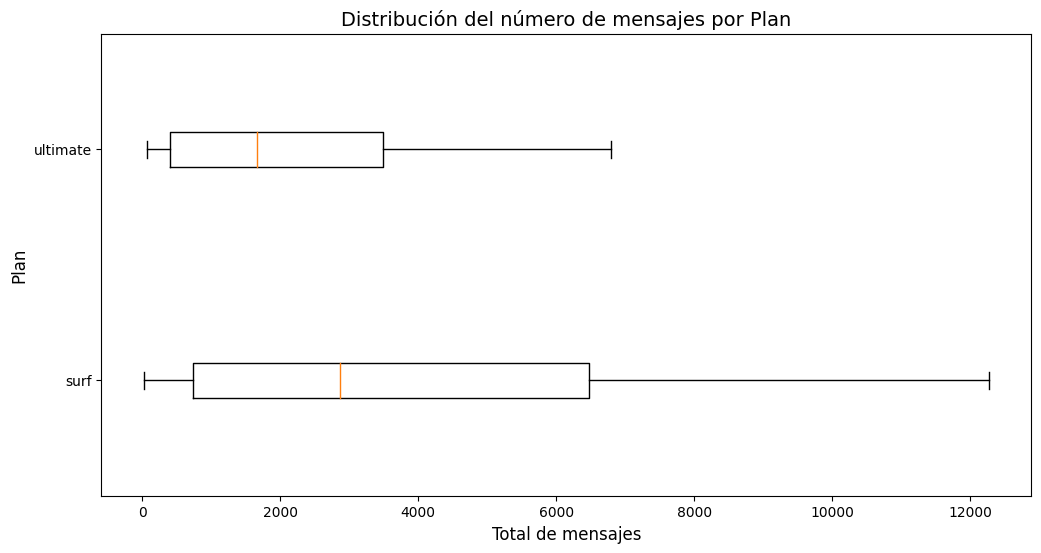

In [51]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

messages_per_month= df.groupby(["plan","period_time"])["total_messages"].sum().reset_index()
messages_per_month.index +=1

print(messages_per_month)


#Graficamos para comparar ambos planes
plans = messages_per_month['plan'].unique()#Separamos ambos planes ("surf","ultimate")

plt.figure(figsize=(12, 6))

messages_surf = messages_per_month[messages_per_month['plan'] == "surf"]['total_messages'].values 
messages_ultimate = messages_per_month[messages_per_month['plan'] == "ultimate"]['total_messages'].values 
      
plt.boxplot([messages_surf, messages_ultimate], vert=False)

plt.title("Distribución del número de mensajes por Plan", fontsize=14)
plt.xlabel("Total de mensajes", fontsize=12)
plt.ylabel("Plan", fontsize=12)

plt.yticks([1, 2], ["surf","ultimate"])

plt.show()

In [57]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

#Obtenemos el total de GB consumidos por los usuaarios al mes de cada plan 
gb_per_month= df.groupby(["plan","period_time"])["total_gb_used"].sum().reset_index() 
gb_per_month.index +=1
print(gb_per_month)


        plan period_time  total_gb_used
1       surf     2018-01           10.0
2       surf     2018-02          110.0
3       surf     2018-03          312.0
4       surf     2018-04          611.0
5       surf     2018-05         1087.0
6       surf     2018-06         1502.0
7       surf     2018-07         2042.0
8       surf     2018-08         2735.0
9       surf     2018-09         3238.0
10      surf     2018-10         4126.0
11      surf     2018-11         4650.0
12      surf     2018-12         5800.0
13  ultimate     2018-01           29.0
14  ultimate     2018-02          121.0
15  ultimate     2018-03          221.0
16  ultimate     2018-04          343.0
17  ultimate     2018-05          489.0
18  ultimate     2018-06          725.0
19  ultimate     2018-07          973.0
20  ultimate     2018-08         1267.0
21  ultimate     2018-09         1463.0
22  ultimate     2018-10         1878.0
23  ultimate     2018-11         2174.0
24  ultimate     2018-12         2778.0


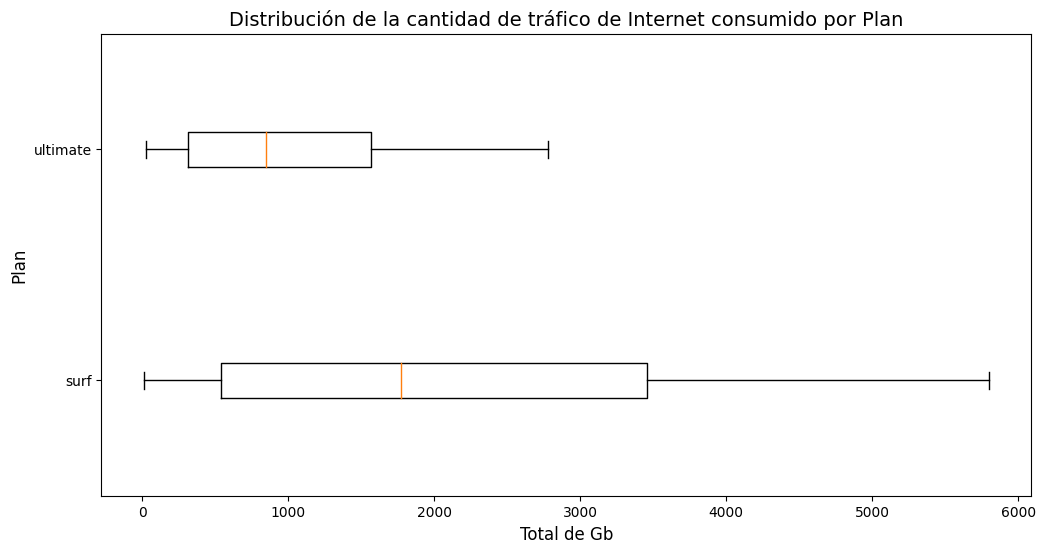

In [58]:
#Graficamos para comparar ambos planes
plans = gb_per_month['plan'].unique()#Separamos ambos planes ("surf","ultimate")

plt.figure(figsize=(12, 6))

gb_surf = gb_per_month[gb_per_month['plan'] == "surf"]['total_gb_used'].values 
gb_ultimate = gb_per_month[gb_per_month['plan'] == "ultimate"]['total_gb_used'].values 
      
plt.boxplot([gb_surf, gb_ultimate], vert=False)

plt.title("Distribución de la cantidad de tráfico de Internet consumido por Plan", fontsize=14)
plt.xlabel("Total de Gb", fontsize=12)
plt.ylabel("Plan", fontsize=12)

plt.yticks([1, 2], ["surf","ultimate"])

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

R=Tanto para mensajes, minutos en llamada como gb consumidos podemos ver una tendencia de que los usuarios del plan surf tienden a consumir más de estos servicios e incluso exceder bastante los min, sms y gb que su plan les incluye; por lo que terminan pagando mucho dinero extra por ello. Todos estos datos los podemos observar en su distribución, IQR y mediana de cada elemento (minutos, mensajes y gb).

### Internet

In [59]:
print(gb_per_month)

        plan period_time  total_gb_used
1       surf     2018-01           10.0
2       surf     2018-02          110.0
3       surf     2018-03          312.0
4       surf     2018-04          611.0
5       surf     2018-05         1087.0
6       surf     2018-06         1502.0
7       surf     2018-07         2042.0
8       surf     2018-08         2735.0
9       surf     2018-09         3238.0
10      surf     2018-10         4126.0
11      surf     2018-11         4650.0
12      surf     2018-12         5800.0
13  ultimate     2018-01           29.0
14  ultimate     2018-02          121.0
15  ultimate     2018-03          221.0
16  ultimate     2018-04          343.0
17  ultimate     2018-05          489.0
18  ultimate     2018-06          725.0
19  ultimate     2018-07          973.0
20  ultimate     2018-08         1267.0
21  ultimate     2018-09         1463.0
22  ultimate     2018-10         1878.0
23  ultimate     2018-11         2174.0
24  ultimate     2018-12         2778.0


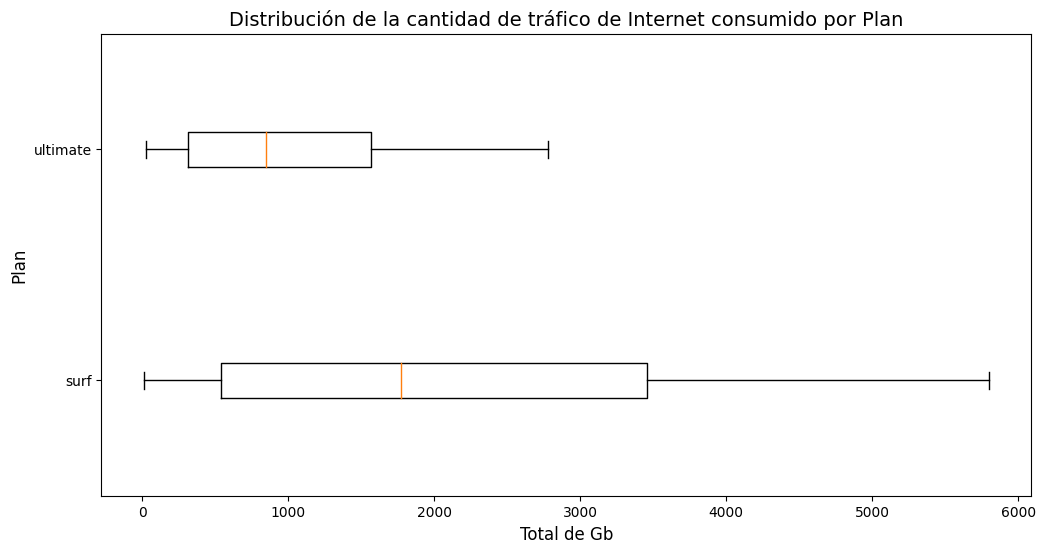

In [60]:
#Graficamos para comparar ambos planes
plans = gb_per_month['plan'].unique()#Separamos ambos planes ("surf","ultimate")

plt.figure(figsize=(12, 6))

gb_surf = gb_per_month[gb_per_month['plan'] == "surf"]['total_gb_used'].values 
gb_ultimate = gb_per_month[gb_per_month['plan'] == "ultimate"]['total_gb_used'].values 
      
plt.boxplot([gb_surf, gb_ultimate], vert=False)

plt.title("Distribución de la cantidad de tráfico de Internet consumido por Plan", fontsize=14)
plt.xlabel("Total de Gb", fontsize=12)
plt.ylabel("Plan", fontsize=12)

plt.yticks([1, 2], ["surf","ultimate"])

plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

R= Ya respondí esta pregunta en el apartado anterior que me pedía lo mismo en cuanto al tráfico de internet. Pero nuevamente mis conclusiones de acuerdo a lo que podemos observar es que los usuarios del plan surf su mediana de uso de gb es superior a los usuarios del plan ultimate.

## Ingreso

.

In [61]:
plan_describe= df.groupby("plan")["debt"].describe()
print(plan_describe)
print()
plan_sum= df.groupby("plan")["debt"].sum()
print("Suma total de ingresos por plan")
print(plan_sum)

           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00

Suma total de ingresos por plan
plan
surf        95491.18
ultimate    52066.00
Name: debt, dtype: float64


In [62]:
plan_var=df.groupby("plan")["debt"].var()
print(plan_var)

plan
surf        3067.835152
ultimate     129.848486
Name: debt, dtype: float64


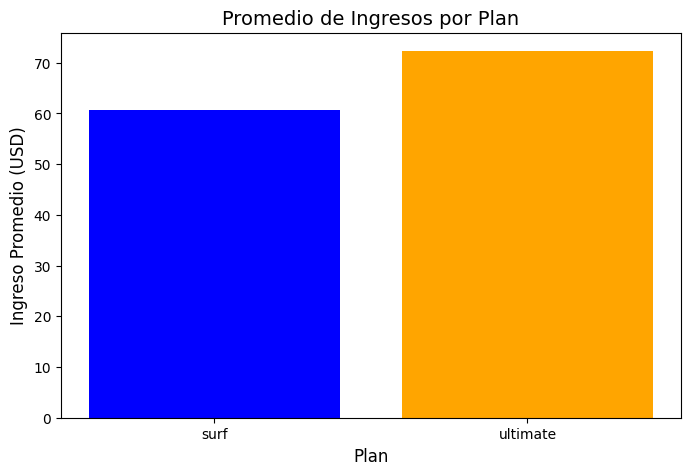

In [64]:
plan_mean = df.groupby("plan")["debt"].mean()

# Graficamos...
plt.figure(figsize=(8, 5))
plt.bar(plan_mean.index, plan_mean.values, color=['blue', 'orange'])

plt.title("Promedio de Ingresos por Plan", fontsize=14)
plt.xlabel("Plan", fontsize=12)
plt.ylabel("Ingreso Promedio (USD)", fontsize=12)

plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

R= Podemos sacar varias conclusiones con estos datos, pero el principal a mi parecer es que los usuarios del plan surf como ya hemos visto antes, tienden a usar mucho más el servicio y por tanto su deuda aumenta, haciendo que estos sean los que más ingresos le generan a Megaline.

En las medias nos damos cuenta que a pesar de que la media del plan ultimate es mayor a la del plan surf, esto se debe a que su media de 72.31 no se aleja del valor que cuesta el plan (70 usd), por lo tanto son pocos los usuarios de este plan que sobrepasan lo que les viene incluido en su plan. Mientras que los del plan surf han llegado a gastar hasta 590.37 USD, cuando su plan no cuesta más que 20 USD.

El promedio de gastos que realiza un usuario del plan surf es de 55.38 USD, lo cual es 35.38 USD por arriba de su costo original del plan (20 USD). 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente elección para las visualizaciones de datos. Además, calculaste correctamente la información estadística de cada distribución de datos (minutos, mensajes e internet). Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Respecto a la información sobre **Ingresos**, seguramente las gráficas y datos que obtuviste cambiarán cuando hagas el ajuste en el cálculo de los cobros mensuales por usuario en cada plan. 

</div>
</div>

## Prueba las hipótesis estadísticas

.

Hipotesis nula: Los ingresos promedio del plan Surf son iguales al del plan Ultimate.
   
   Hipotesis alternativa: Los ingresos promedio del plan Surf son diferentes al del plan Ultimate.
   
   alpha= 0.05

In [65]:
# Prueba las hipótesis
from scipy import stats as st

surf_income = df[df["plan"] == "surf"]["debt"]

ultimate_income = df[df["plan"] == "ultimate"]["debt"]

alpha= 0.05 

results= st.ttest_ind(surf_income, ultimate_income, equal_var= False)
print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia de que los ingresos promedio son diferentes")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia de que los ingresos promedio sean diferentes ")

Valor p: 3.1703905481135734e-15
Rechazamos la hipótesis nula: hay evidencia de que los ingresos promedio son diferentes


#### Hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

Hipótesis nula= El ingreso promedio de los usuarios del área de NY-NJ es igual a la de los usuarios de otras regiones 

Hipótesis alternativa= El ingreso promedio de los usuarios del área de NY-NJ es diferente a la de los usuarios de otras regiones 

alpha= 0.05

In [66]:
# Prueba las hipótesis

#Primero separaré mis datos para después buscar probar la hipótesis.

#Extraemos primero los usuarios de NY-NJ y los de otras regiones
ny_nj_citizens= users[users["city"]== "New York-Newark-Jersey City, NY-NJ-PA MSA"]
other_region_citizens= users[users["city"]!="New York-Newark-Jersey City, NY-NJ-PA MSA"]


#Extraemos la deuda de cada usuario de NY-NJ y la de otras regiones 
ny_nj_income= ny_nj_citizens.merge(df[["user_id","debt"]], on= "user_id", how="left")
ny_nj_income= ny_nj_income[['user_id', 'city', 'debt']]

other_region_income= other_region_citizens.merge(df[["user_id","debt"]], on= "user_id", how="left")
other_region_income= other_region_income[['user_id', 'city', 'debt']]


#Como nos dio su deuda mensual sumamos la deuda de cada usuario para obtener cual es su deuda al año
ny_nj_income_grouped= ny_nj_income.groupby(["user_id","city"])["debt"].sum()
other_region_grouped= other_region_income.groupby(["user_id","city"])["debt"].sum()

#Sacamos el promedio de gasto de todos los usuarios
ny_nj_income_mean= ny_nj_income_grouped.mean()
other_region_mean= other_region_grouped.mean()
print("Promedio de deuda anual para usuarios de NY-NJ:", ny_nj_income_mean, "USD")
print("Promedio de deuda anual para usuarios de otras regiones:", other_region_mean, "USD")
print()


#Prueba de hipótesis
#Hipótesis nula= El ingreso promedio de los usuarios del área de NY-NJ es igual a la de los usuarios de otras regiones
#Hipótesis alternativa= El ingreso promedio de los usuarios del área de NY-NJ es diferente a la de los usuarios de otras regiones

alpha= 0.05

result=st.ttest_ind(ny_nj_income_grouped,other_region_grouped,equal_var= False)
print("Valor p:", result.pvalue)

if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia de que los ingresos promedio son diferentes")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia de que los ingresos promedio sean diferentes ")

Promedio de deuda anual para usuarios de NY-NJ: 282.379375 USD
Promedio de deuda anual para usuarios de otras regiones: 297.5400714285714 USD

Valor p: 0.6183505000821642
No podemos rechazar la hipótesis nula: no hay suficiente evidencia de que los ingresos promedio sean diferentes 


## Conclusión general

La pregunta que se nos planteó al inicio del proyecto: ¿cuál de las tarifas genera más ingresos?, para poder ajustar el presupuesto de publicidad; me llevó a las siguientes conclusiones en base al analisis realizado. Mis conclusiones son que la tarifa del plan surf es la que mayores ingresos genera a la compañía; esto podría deberse tal vez a que los usuarios prefieren pagar un plan más económico de 20 USD a uno de 70 USD, pero al final son esos mismos usuarios del plan surf los que terminan pagando mucho más dinero por minutos, sms y mb extras. Este comportamiento que menciono lo podemos observar y analizar en los gráficos de distribuciones que hicimos.

Pudimos observar como la media de dinero gastado por los usuarios de ambos planes son totalmente diferentes. En el plan ultimate la media de los usuarios no se alejaba de los 70 USD, precio en el cual está el plan ultimate (la media llegó a 72.31 USD) mientras que la media de los usuarios del plan surf se alejó a más del doble del precio de la tarifa que son 20 USD (la media llegó a 55.38 USD, 35.38 USD extras a la tarifa original del plan) .

El que la media del plan ultimate haya sido mayor al del plan surf en cuanto a promedio de USD no se debe más que a que como acabo de mencionar, su media esta muy cerca del precio inicial de la tarifa del plan. Esto no nos indica que haya generado mayores ingresos. Como pudimos ver tambien en la distribución "máxima" de los gastos de los usuarios para cada plan, en el plan surf han gastado hasta 590.37 USD mientras que en el plan ultimate lo máximo gastado por el usuario fue de 182 USD, una completa locura si comparamos ambos. 

Como observación final y para probar cuál de los 2 planes ha generado mayores ingresos a la compañía, se sumó el total de ingresos de ambos planes en el año y obtuvimos un total de 52,066 USD para el plan ultimate y 95,491.18 para el plan surf; una diferencia de 43,425.18 USD entre ambos. No cabe duda que el plan surf es el que mayores ingresos a generado en el 2018.